In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


<Axes: >

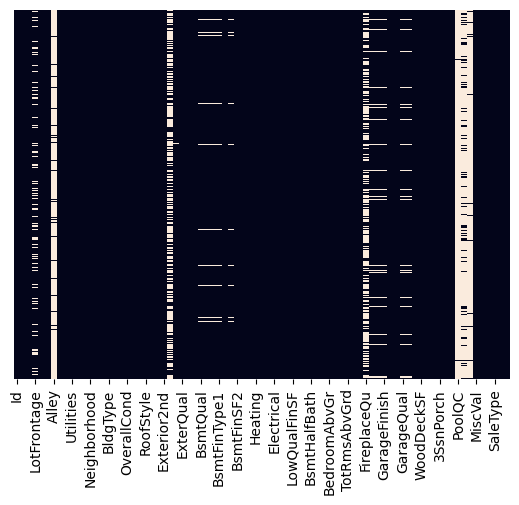

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   str    
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   str    
 6   Alley          91 non-null     str    
 7   LotShape       1460 non-null   str    
 8   LandContour    1460 non-null   str    
 9   Utilities      1460 non-null   str    
 10  LotConfig      1460 non-null   str    
 11  LandSlope      1460 non-null   str    
 12  Neighborhood   1460 non-null   str    
 13  Condition1     1460 non-null   str    
 14  Condition2     1460 non-null   str    
 15  BldgType       1460 non-null   str    
 16  HouseStyle     1460 non-null   str    
 17  OverallQual    1460 non-null   int64  
 18  OverallCond    1460

In [7]:
df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [8]:
# fill missing values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.drop(['Alley'], axis=1, inplace=True)

In [10]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])


In [11]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [12]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [13]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [14]:
df.shape

(1460, 76)

In [15]:
df.drop(['Id'],axis=1,inplace=True)

In [16]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [17]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<Axes: >

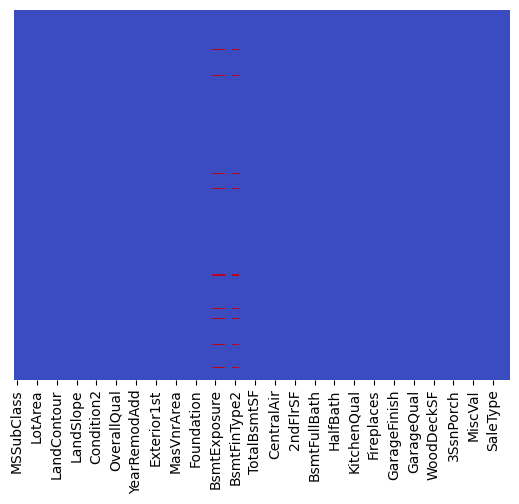

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [19]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<Axes: >

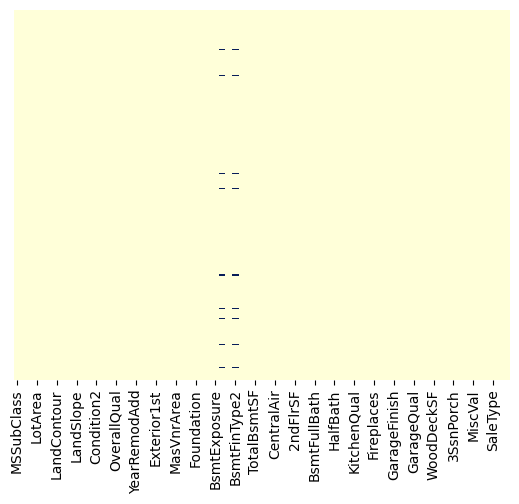

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [21]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(1422, 75)

In [24]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:

columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']


In [26]:
len(columns)

39

In [27]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:

        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:

            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1


    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [28]:
main_df=df.copy()

In [29]:
## Combine Test Data

test_df=pd.read_csv('formulatedtest.csv')

In [30]:
test_df.shape

(1459, 74)

In [31]:
final_df=pd.concat([df,test_df], axis=0)

In [32]:
final_df.shape

(2881, 75)

In [33]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [34]:
final_df.shape

(2881, 234)

In [35]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [36]:
final_df.shape

(2881, 174)

In [37]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,True,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,True,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,True,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,True,True,False,False,False,False,True,False


In [38]:
df_train=final_df.iloc[:1422,:]
df_test=final_df.iloc[1422:,:]

In [39]:
df_train.shape

(1422, 174)

In [40]:
df_test.shape

(1459, 174)

In [41]:
X=df_train.drop(['SalePrice'],axis=1)
y=df_train['SalePrice']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
# from sklearn.ensemble import GradientBoostingRegressor

# gbr = GradientBoostingRegressor(
#     n_estimators=1000,
#     learning_rate=0.05,
#     max_depth=4,
#     random_state=42
# )

# gbr.fit(X_train, y_train)

# pred = gbr.predict(X_test)

# from sklearn.metrics import mean_squared_error
# import numpy as np

# rmse = np.sqrt(mean_squared_error(y_test, pred))
# print("RMSE:", rmse)

In [44]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np

# rf = RandomForestRegressor(
#     n_estimators=800,
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     max_features='sqrt',
#     random_state=42,
#     n_jobs=-1
# )

# rf.fit(X_train, y_train)

# # Predictions
# train_pred_rf = rf.predict(X_train)
# test_pred_rf = rf.predict(X_test)

# # RMSE
# train_rmse_rf = np.sqrt(mean_squared_error(y_train, train_pred_rf))
# test_rmse_rf = np.sqrt(mean_squared_error(y_test, test_pred_rf))

# print("Random Forest Train RMSE:", train_rmse_rf)
# print("Random Forest Test RMSE:", test_rmse_rf)

In [45]:
# from xgboost import XGBRegressor

# xgb = XGBRegressor(
#     n_estimators=1500,
#     learning_rate=0.03,
#     max_depth=4,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42,
#     n_jobs=-1
# )

# xgb.fit(X_train, y_train)

# # Predictions
# train_pred_xgb = xgb.predict(X_train)
# test_pred_xgb = xgb.predict(X_test)

# # RMSE
# train_rmse_xgb = np.sqrt(mean_squared_error(y_train, train_pred_xgb))
# test_rmse_xgb = np.sqrt(mean_squared_error(y_test, test_pred_xgb))

# print("XGBoost Train RMSE:", train_rmse_xgb)
# print("XGBoost Test RMSE:", test_rmse_xgb)

### Hyperparameter Tuning

In [46]:
# import xgboost
# from sklearn.model_selection import RandomizedSearchCV

# regressor=xgboost.XGBRegressor()

# booster=['gbtree','gblinear']
# base_score=[0.25,0.5,0.75,1]

# n_estimators = [100, 500, 900, 1100, 1500]
# max_depth = [2, 3, 5, 10, 15]
# booster=['gbtree','gblinear']
# learning_rate=[0.05,0.1,0.15,0.20]
# min_child_weight=[1,2,3,4]

# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'min_child_weight':min_child_weight,
#     'booster':booster,
#     'base_score':base_score
# }


# # Set up the random search with 4-fold cross validation
# random_cv = RandomizedSearchCV(
#     estimator=regressor,
#     param_distributions=hyperparameter_grid,
#     cv=5,
#     n_iter=50,
#     scoring = 'neg_mean_absolute_error',n_jobs = 4,
#     verbose = 5,
#     return_train_score = True,
#     random_state=42
# )

# random_cv.fit(X_train,y_train)

In [48]:
# print(random_cv.best_estimator_)

In [49]:
# best_params = random_cv.best_params_
# print(best_params)

In [50]:
# print(random_cv.best_estimator_.get_params())

In [51]:
# import pprint
# pprint.pprint(random_cv.best_estimator_.get_params())

In [52]:
# best_params = random_cv.best_params_
# print(best_params)

In [53]:
best_params = {'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.1, 'booster': 'gbtree', 'base_score': 0.25}

In [54]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [55]:
from xgboost import XGBRegressor

final_model = XGBRegressor(
    **best_params,        # automatically insert tuned parameters
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
import numpy as np

train_pred = final_model.predict(X_train)
test_pred = final_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 0.051301221190761366
Test RMSE: 0.1517923211191832


In [56]:
df_test.shape

(1459, 174)

In [57]:
df_train.shape


(1422, 174)

In [58]:
df_train.columns==df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [59]:
df_test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Min1', 'Min2', 'Typ', 'Attchd', 'Basment', 'BuiltIn', 'CarPort',
       'Detchd', 'RFn', 'P'],
      dtype='str', length=174)

In [60]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,True,True,False,False,False,False,False,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,True,True,False,False,False,False,False,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,True,True,False,False,False,False,False,False
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,True,True,False,False,False,False,False,False
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,True,True,False,False,False,False,True,False


In [61]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

In [62]:
df_test_pred = final_model.predict(df_test)

In [63]:
df_test_pred

array([11.710468, 11.990248, 12.170419, ..., 12.041754, 11.622662,
       12.315726], shape=(1459,), dtype=float32)

In [64]:
nw_ot = pd.read_csv('test.csv')
nw_ot['SalePrice']=df_test_pred

In [65]:
nw_ot

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,11.710468
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,11.990248
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,12.170419
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,12.194905
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,12.242049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,11.303911
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,11.220509
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,12.041754
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,11.622662


In [66]:
new_output=nw_ot[['Id','SalePrice']]

In [67]:
new_output

,Id,SalePrice
0,1461,11.710468
1,1462,11.990248
2,1463,12.170419
3,1464,12.194905
4,1465,12.242049
...,...,...
1454,2915,11.303911
1455,2916,11.220509
1456,2917,12.041754
1457,2918,11.622662


In [68]:
new_output.to_csv('output_test.csv', index=False)

In [70]:
for col in df_train.columns:
    print(col)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
FV
RH
RL
RM
Pave
IR2
IR3
Reg
HLS
Low
Lvl
NoSeWa
CulDSac
FR2
FR3
Inside
Mod
Sev
Blueste
BrDale
BrkSide
ClearCr
CollgCr
Crawfor
Edwards
Gilbert
IDOTRR
MeadowV
Mitchel
NAmes
NPkVill
NWAmes
NoRidge
NridgHt
OldTown
SWISU
Sawyer
SawyerW
Somerst
StoneBr
Timber
Veenker
Feedr
Norm
PosA
PosN
RRAe
RRAn
RRNn
2fmCon
Duplex
Twnhs
TwnhsE
RRNe
1.5Unf
1Story
2.5Fin
2.5Unf
2Story
SFoyer
SLvl
CWD
Con
ConLD
ConLI
ConLw
New
Oth
WD
AdjLand
Alloca
Family
Normal
Partial
Fa
Gd
Po
TA
CBlock
PConc
Slab
Stone
Wood
Mn
No
BLQ
GLQ
LwQ
Rec
Unf
Gable
Gambrel
Hip
Mansard
Shed
CompShg
Membran
Metal
Roll
Tar&Grv
WdShake
WdShngl
AsphShn
Br

(1422, 174)

In [74]:
import joblib

# Save model
joblib.dump(final_model, "../models/xgb_model.pkl")

# Save column names
joblib.dump(X.columns.tolist(), "../models/model_columns.pkl")

print("Model and columns saved successfully!")

Model and columns saved successfully!
